# Data Validation

______________________
**Project Title:** Tissue Classification VGG16

**Program:** MSc. Applied Information & Data Science

**Supervisor:** Dr. Umberto Michelucci & Dr. Mirko Birbaumer

**Authors:** Manuel Frei & Anna-Lena Klaus

**Date:** 30.03.2023


After preparing the dataset, implementing the model, reducing the overfitting and running it, the results of the model needed to be validated.

>[Data Validation](#scrollTo=_mPbmTaj4hF1)

>>[Importing Dependencies](#scrollTo=FxyiK1nATtzq)

>>[Loading saved final model](#scrollTo=91yMrMsqBNX9)

>>[Model Evaluation](#scrollTo=G7vJuZeUslAi)

>>[Creating confusion matrix of our results](#scrollTo=I_8mTslPKthT)

>>[Loss function](#scrollTo=YFoPQbDFCMO_)

>>[ROC-Curve](#scrollTo=9ZV20LOSyoau)



## Importing Dependencies

As a first step, the required libraries for data preparation are imported and the notebook is mounted with Google Drive to retrieve the data. 

In [1]:
# import dependencies and modules needed in this notebook
import os
import random
import pandas as pd
import cv2
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import load_img
from keras.models import load_model
import matplotlib.image
from sklearn import metrics
from keras import backend as K


In [2]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

## Loading saved final model

To work with the results of the models, in the previous "data-modelling"-notebook the results were saved. In this notebook we are able to load the results again.

source: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [5]:
# load final model
model = load_model('../VGG16/models_weights/final_model_vgg16.h5')

# summarize model to get the architecture of the final model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 50)                409650    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 8)                 168       
                                                                 
Total params: 15,125,526
Trainable params: 410,838
Non-t

After loading the final model we used the test dataset to validate our model.

In [ ]:
# split into input (X) and output (Y) variables
X_test = np.load('../VGG16/data/preprocessed_data/tissue_classification/x_test.npy')
y_test = np.load('../VGG16/data/preprocessed_data/tissue_classification/y_test.npy')

In [ ]:
# evaluate the model on the test dataset
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 90.40%


The goal of this project was to reach 90% accuracy while reducing the overfitting as much as possible. With 90.40% as an accuracy we reached our goal.

## Model Evaluation

Validating the model can be done with multiple performance metrics. Therefore more metrics were in the final model included.

- **Loss**: Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero.
- **Accuracy**: Accuracy is the proximity of measurement results to the true value. It tell us how accurate our classification model is able to predict the class labels given in the problem statement.
- **AUC**: Area under the curve. The area under the ROC curve is known as AUC. The more the AUC the better your model is. The farther away your ROC curve is from the middle linear line, the better your model is.
- **Precision**: Precision answers the question of what proportion of positive identifications was actually correct?
- **Recall**: Recall is generally used in use cases where the truth-detection is of utmost importance.


With true-positives, true-negatives, false-positives and false-negatives a confusion matrix can be built.

- **True-positives**: Where the actual label for that column was “Yes” in the test dataset and our VGG16 model also predicted “Yes”
- **True-negatives**: Where the actual label for that column was “No” in the test dataset and our VGG16 model also predicted “No”.
- **False-positives**: Where the actual label for that column was “No” in the test dataset but our VGG16 model predicted “Yes”.
- **False-negatives**: Where the actual label for that column was “Yes” in the test dataset but our VGG16 model predicted “No”.


- **Sensitivity_at_specificity**: The ability of a test to correctly identify patients with a disease. Specificity: the ability of a test to correctly identify people without the disease.
- **Specificity_at_sensitivity**: Specificity (also called the true negative rate) measures the proportion of actual negatives that are correctly identified as such.

Source: 
- https://towardsdatascience.com/top-10-model-evaluation-metrics-for-classification-ml-models-a0a0f1d51b9
- https://www.baeldung.com/cs/ml-loss-accuracy
- https://ebn.bmj.com/content/23/1/2

In [ ]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names[0], score[0]*100)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print(model.metrics_names[2], score[2]*100)
print(model.metrics_names[3], score[3]*100)
print(model.metrics_names[4], score[4]*100)
print(model.metrics_names[5], score[5])
print(model.metrics_names[6], score[6])
print(model.metrics_names[7], score[7])
print(model.metrics_names[8], score[8])
print(model.metrics_names[9], score[9]*100)
print(model.metrics_names[10], score[10]*100)
print(model.metrics_names[11], score[11]*100)


loss 35.73644757270813
accuracy: 89.10%
auc 99.24590587615967
precision 90.69286584854126
recall 87.69999742507935
true_positives 877.0
true_negatives 6910.0
false_positives 90.0
false_negatives 123.0
precision_at_recall 95.92814445495605
sensitivity_at_specificity 99.80000257492065
specificity_at_sensitivity 99.97143149375916


In [ ]:
# Predict the Labels using the reloaded Model
Ypredict = model.predict(X_test)  
Ypredict

32/32 [==============================] - 2s 59ms/step


array([[1.81185792e-03, 8.70433112e-04, 8.63909841e-01, ...,
        9.43647698e-03, 1.23748139e-01, 1.86264384e-04],
       [1.11077379e-05, 1.80411041e-01, 8.98012309e-04, ...,
        8.52965713e-02, 1.00304801e-02, 7.37361703e-03],
       [3.53609653e-06, 3.49044986e-02, 3.91549838e-04, ...,
        1.63617806e-04, 1.03773535e-04, 9.62143064e-01],
       ...,
       [9.97935653e-01, 1.14513739e-06, 7.05390121e-04, ...,
        1.01067708e-05, 1.54911235e-04, 4.97662040e-05],
       [2.34743282e-02, 4.92908566e-06, 1.81283729e-04, ...,
        7.01551198e-06, 6.56899705e-04, 3.27491172e-04],
       [2.40036243e-05, 3.89407456e-01, 2.85328384e-02, ...,
        1.13407173e-03, 5.79787850e-01, 6.25251560e-04]], dtype=float32)

In [ ]:
# show the inputs and predicted outputs
for i in range(len(X_test)):
 print("X=%s, Predicted=%s" % (X_test[i], Ypredict[i]))

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
X=[[[0.44313726 0.18039216 0.44313726]
  [0.42352942 0.16078432 0.42352942]
  [0.4117647  0.15294118 0.36862746]
  ...
  [0.3529412  0.16470589 0.41568628]
  [0.25490198 0.07450981 0.28235295]
  [0.25490198 0.07450981 0.28235295]]

 [[0.38039216 0.14509805 0.28627452]
  [0.4509804  0.21568628 0.35686275]
  [0.5176471  0.2784314  0.43529412]
  ...
  [0.28235295 0.09803922 0.3019608 ]
  [0.23921569 0.07843138 0.18431373]
  [0.24705882 0.08627451 0.19215687]]

 [[0.4392157  0.22352941 0.41568628]
  [0.47843137 0.2627451  0.45490196]
  [0.4745098  0.26666668 0.43529412]
  ...
  [0.29803923 0.10588235 0.30980393]
  [0.27450982 0.08627451 0.21960784]
  [0.2627451  0.07450981 0.20784314]]

 ...

 [[0.4745098  0.28627452 0.35686275]
  [0.29411766 0.10588235 0.1764706 ]
  [0.21568628 0.06666667 0.16470589]
  ...
  [0.25882354 0.07450981 0.16078432]
  [0.23137255 0.04313726 0.15294118]
  [0.2784314  0.09019608 0.2       ]]

 [[0.

## Creating confusion matrix of our results

A confusion matrix, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarized with count values and broken down by each class. To validate our model we created a confusion matrix to visualize the correct classified tissues.

Source:
https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d

In [ ]:
# Importing the corresponding modul
from sklearn.metrics import confusion_matrix

In [ ]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

        # Visualizing
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [ ]:
# Prediction based on the test dataset
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

32/32 [==============================] - 2s 60ms/step


In [ ]:
# Making prediction
y_true = np.argmax(y_test,axis=1)

In [ ]:
# Plotting the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

Confusion matrix, without normalization


<Axes: title={'center': 'Non-Normalized VGG19 Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

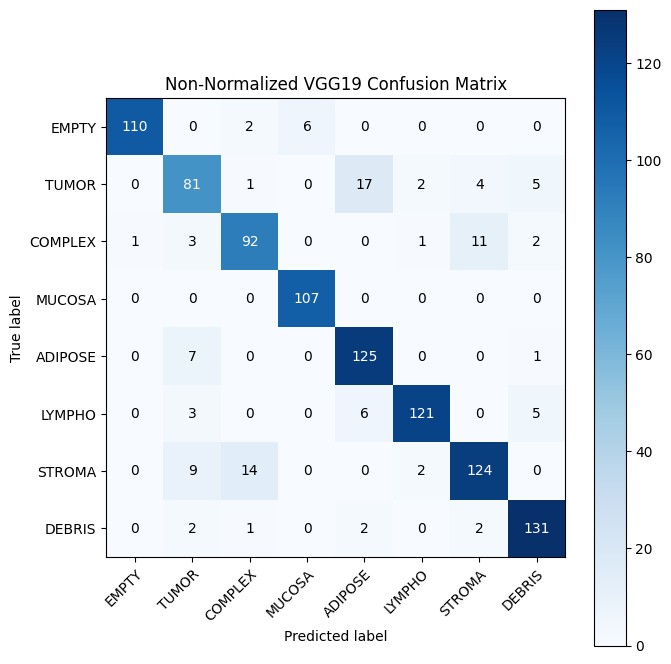

In [ ]:
# Defining the names of the classes
class_names=['EMPTY', 'TUMOR', 'COMPLEX', 'MUCOSA', 'ADIPOSE', 'LYMPHO','STROMA', 'DEBRIS']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,  title = 'Non-Normalized VGG19 Confusion Matrix')

Based on the results above we calculated the accuracy per tissue class we included in our presentation slides.

## Loss function
We used the history to work with the results of our final model. Therefore we went with the loss function we already used while evaluating the base, starter and all the models on the was to our final model. Here we created the loss function for our test dataset.

source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
# loading history of model
history=np.load('../VGG16/models_weights/final_model_vgg16.npy',allow_pickle='TRUE').item()

In [ ]:
# define function to plot train and validation accuracy and loss of the trained models
def plot_accuracy_loss(model_hist):
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='lower right')
  plt.show()

  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper right')
  plt.show()

In [ ]:
# importing the relevant module
from keras.metrics import AUC, Accuracy

In [ ]:
# define function to plot train and validation accuracy and loss of the trained models
def plot_accuracy_loss_AUC(model_hist):
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='lower right')
  plt.show()

# Creates model loss
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper right')
  plt.show()

# Creates AUC (Area under the ROC Curve)
  plt.plot(history['auc'])
  plt.plot(history['val_auc'])
  plt.title('Training and Validation AUC')
  plt.ylabel('AUC')
  plt.xlabel('No. of epochs')
  plt.legend(['AUC', 'VAL_AUC'], loc='lower right')
  plt.show()


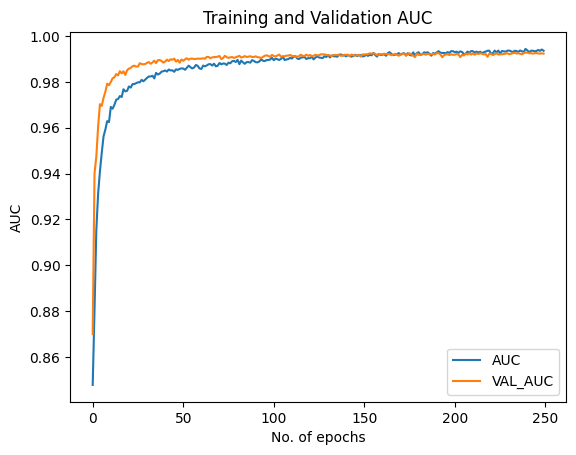

In [ ]:
# plot train and validation accuracy 
plot_accuracy_loss_AUC(history)

## ROC-Curve
To get a better understanding, how good the tumor was classified in comparison to all other tissues we worked with the ROC-Curve.

In [ ]:
# Loading the train datasets
y_train = np.load('../VGG16/data/preprocessed_data/tissue_classification/y_train.npy')
X_train = np.load('../VGG16/data/preprocessed_data/tissue_classification/x_train.npy')

In [ ]:
# Binarize the dataset to classify tumor tissues against all the others
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(1000, 8)

In [ ]:
# defining the relevant class
label_binarizer.transform(["TUMOR"])

/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


array([[0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# printing the visualisation
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

class_id = 0

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    predict_x[:, class_id],
    name=f" TUMOR vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Tumor vs all other tissues")
plt.legend()
plt.show()